In [1]:
# import pandas, random and numpy
import pandas as pd
from random import randint
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Make random data
def random_data(n):
    data = []
    cols = ['Suhu','Titik_Embun','Tekanan_Udara','Jarak_Pandang','Cuaca']
    for i in range(n):
        y = randint(1,3)
        if y == 1:
            a = randint(25,30)+float(randint(0,5)*0.1)
            b = randint(20,30)+float(randint(0,2)*0.1)
            c = 1000+randint(6,8)
            d = randint(4,8)+float(randint(0,8)*0.1)
        elif y == 2:
            a = randint(25,28)+float(randint(0,8)*0.1)
            b = randint(20,25)+float(randint(0,2)*0.1)
            c = 1000+randint(8,15)
            d = randint(8,10)+float(randint(0,8)*0.1)
        elif y == 3:
            a = randint(24,26)+float(randint(0,8)*0.1)
            b = randint(25,28)+float(randint(0,2)*0.1)
            c = 1000+randint(4,5)
            d = randint(1,3)+float(randint(0,8)*0.1)
        y = weighted(y)
        data.append([a,b,c,d,y])
    df = pd.DataFrame(data,columns=cols)
    return df

        
def weighted(status):
    if status == 1:
        return "Cerah"
    elif status == 2:
        return "Berawan"
    else:
        return "Hujan"

In [3]:
# call function
data = random_data(500)

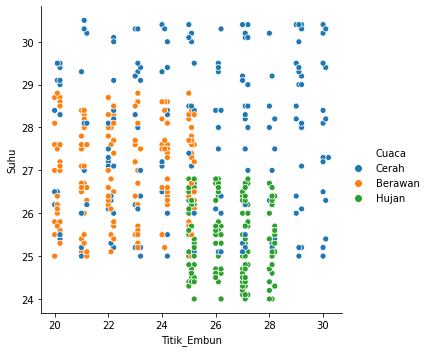

In [4]:
sns.relplot(x="Titik_Embun", y="Suhu", hue="Cuaca", data=data);

In [5]:
print(data['Cuaca'].unique())

['Cerah' 'Berawan' 'Hujan']


In [6]:
print(data.describe())

             Suhu  Titik_Embun  Tekanan_Udara  Jarak_Pandang
count  500.000000   500.000000     500.000000      500.00000
mean    26.802800    24.732600    1007.588000        6.15080
std      1.641054     2.780702       3.101208        2.91574
min     24.000000    20.000000    1004.000000        1.00000
25%     25.500000    22.200000    1005.000000        3.50000
50%     26.500000    25.100000    1007.000000        6.50000
75%     28.100000    27.000000    1009.000000        8.60000
max     30.500000    30.200000    1015.000000       10.80000


In [7]:
print(data['Cuaca'].value_counts())

Cerah      187
Berawan    159
Hujan      154
Name: Cuaca, dtype: int64


In [8]:
data.head()

,Suhu,Titik_Embun,Tekanan_Udara,Jarak_Pandang,Cuaca
0,27.1,24.0,1006,6.3,Cerah
1,28.0,22.1,1010,10.2,Berawan
2,26.0,28.0,1005,1.2,Hujan
3,24.4,25.2,1004,3.6,Hujan
4,28.1,22.0,1014,10.5,Berawan


In [9]:
df = data[['Suhu','Titik_Embun','Tekanan_Udara','Jarak_Pandang']]

In [10]:
label = data ['Cuaca']

In [11]:
df.head()

,Suhu,Titik_Embun,Tekanan_Udara,Jarak_Pandang
0,27.1,24.0,1006,6.3
1,28.0,22.1,1010,10.2
2,26.0,28.0,1005,1.2
3,24.4,25.2,1004,3.6
4,28.1,22.0,1014,10.5


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [13]:
train_x, test_x, train_y, test_y = train_test_split(df, label, test_size=0.30, random_state=42)

In [14]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=3)

In [15]:
pred_y = clf.predict(test_x)

In [16]:
print (pred_y)

['Berawan' 'Cerah' 'Hujan' 'Cerah' 'Hujan' 'Cerah' 'Hujan' 'Berawan'
 'Hujan' 'Berawan' 'Hujan' 'Cerah' 'Berawan' 'Berawan' 'Cerah' 'Berawan'
 'Berawan' 'Cerah' 'Berawan' 'Berawan' 'Berawan' 'Hujan' 'Berawan' 'Cerah'
 'Cerah' 'Berawan' 'Hujan' 'Berawan' 'Cerah' 'Berawan' 'Berawan' 'Berawan'
 'Hujan' 'Hujan' 'Hujan' 'Cerah' 'Hujan' 'Cerah' 'Berawan' 'Berawan'
 'Cerah' 'Cerah' 'Hujan' 'Hujan' 'Cerah' 'Hujan' 'Cerah' 'Berawan' 'Hujan'
 'Cerah' 'Berawan' 'Berawan' 'Berawan' 'Berawan' 'Hujan' 'Hujan' 'Hujan'
 'Berawan' 'Berawan' 'Cerah' 'Hujan' 'Cerah' 'Cerah' 'Hujan' 'Cerah'
 'Cerah' 'Cerah' 'Cerah' 'Hujan' 'Berawan' 'Berawan' 'Hujan' 'Hujan'
 'Hujan' 'Cerah' 'Cerah' 'Hujan' 'Berawan' 'Berawan' 'Hujan' 'Berawan'
 'Hujan' 'Cerah' 'Hujan' 'Hujan' 'Hujan' 'Berawan' 'Berawan' 'Berawan'
 'Cerah' 'Berawan' 'Hujan' 'Berawan' 'Berawan' 'Cerah' 'Hujan' 'Hujan'
 'Hujan' 'Cerah' 'Berawan' 'Berawan' 'Berawan' 'Berawan' 'Hujan' 'Berawan'
 'Hujan' 'Hujan' 'Berawan' 'Cerah' 'Cerah' 'Berawan' 'Cerah' 'Cer

In [17]:
index = test_x.index.tolist()

In [18]:
score = accuracy_score(test_y,pred_y)
print(score)

0.98


In [19]:
akurasiTrain=clf.score(train_x,train_y)
print (akurasiTrain)

0.9828571428571429


In [20]:
akurasiTest=clf.score(test_x,test_y)
print (akurasiTest)

0.98


In [21]:
print("Balanced Accuracy :",balanced_accuracy_score(test_y,pred_y))
print("Confusion Matrix :\n",confusion_matrix(test_y,pred_y))
print("Precision, Recall, F1 Score :",precision_recall_fscore_support(test_y,pred_y, average='macro'))

Balanced Accuracy : 0.9818181818181818
Confusion Matrix :
 [[54  0  0]
 [ 3 52  0]
 [ 0  0 41]]
Precision, Recall, F1 Score : (0.9824561403508771, 0.9818181818181818, 0.9816451965984676, None)


In [22]:
hasilAkurasi = []
for i in range (1,10):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x, train_y)
    pred_y = clf.predict(test_x)
    akurasiTest=accuracy_score(test_y,pred_y)
    hasilAkurasi.append(akurasiTest)

In [23]:
print (hasilAkurasi)

[0.9666666666666667, 0.9733333333333334, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667, 0.98, 0.9866666666666667, 0.9866666666666667]


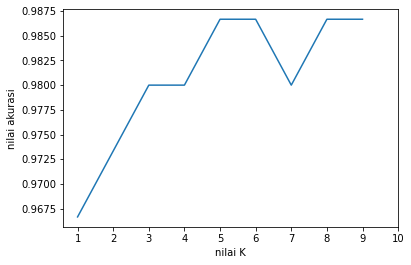

In [24]:
plt.plot(hasilAkurasi)
plt.ylabel('nilai akurasi')
plt.xlabel('nilai K')
plt.xticks(np.arange(10),('1','2','3','4','5','6','7','8','9','10'))
plt.show()

Regression

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [26]:
df.head()

,Suhu,Titik_Embun,Tekanan_Udara,Jarak_Pandang
0,27.1,24.0,1006,6.3
1,28.0,22.1,1010,10.2
2,26.0,28.0,1005,1.2
3,24.4,25.2,1004,3.6
4,28.1,22.0,1014,10.5


In [72]:
dfRegresi = data[['Suhu','Tekanan_Udara']]

In [73]:
labelRegresi = data[['Jarak_Pandang']]

In [74]:
dfRegresi.corr()

,Suhu,Tekanan_Udara
Suhu,1.000000,0.287169
Tekanan_Udara,0.287169,1.000000


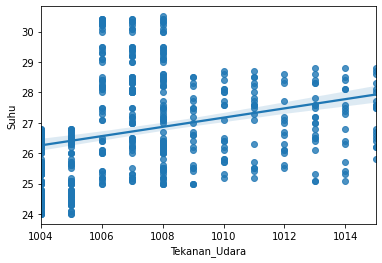

In [75]:
sns.regplot(x="Tekanan_Udara", y="Suhu", data=df) 
# untuk mencari nilai dengan korelasi bagus

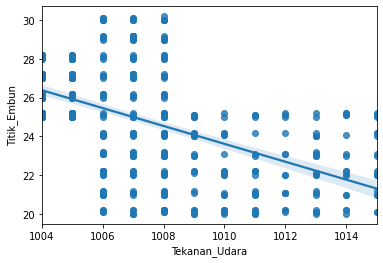

In [76]:
sns.regplot(x="Tekanan_Udara", y="Titik_Embun", data=df) 
# untuk mencari nilai dengan korelasi kurang bagus

In [77]:
labelRegresi = data['Jarak_Pandang']

In [88]:
train_x, test_x, train_y, test_y = train_test_split(dfRegresi, labelRegresi, test_size=0.1, random_state=42)

In [89]:
rgr = KNeighborsRegressor(n_neighbors=3)

In [90]:
rgr.fit(train_x,train_y)

KNeighborsRegressor(n_neighbors=3)

In [91]:
pred_y = rgr.predict(test_x)

In [92]:
print(test_y)

361     8.4
73      6.6
374     2.8
155     5.7
104     3.3
394     7.1
377     2.4
124    10.3
68      3.7
450     9.2
9       2.2
194     8.6
406     9.8
84     10.1
371     7.5
388     8.2
495    10.8
30      6.1
316    10.4
408    10.8
490     8.5
491     1.2
280     9.5
356     7.2
76      7.2
461     8.4
497     1.3
211     9.4
101     8.5
334     8.3
475     9.3
336    10.5
440     3.8
173     3.5
2       1.2
333     7.1
409     3.6
70      6.0
209     8.3
63      9.7
384     6.0
93      7.2
485     3.5
185     3.5
33      7.5
77      1.2
0       6.3
11      9.3
415     3.5
22      6.4
Name: Jarak_Pandang, dtype: float64


In [93]:
print(pred_y)

[ 7.66666667  6.46666667  2.93333333  6.          2.93333333  4.93333333
  2.83333333  9.33333333  3.06666667  7.66666667  2.66666667  5.53333333
 10.3         7.6         7.83333333 10.03333333  8.6         4.16666667
  9.46666667  8.93333333  9.          3.16666667  9.          7.66666667
  6.36666667  9.1         1.66666667  9.4         7.83333333  5.86666667
  9.03333333  8.6         2.7         2.83333333  3.23333333  6.86666667
  2.3         7.66666667  8.3         9.33333333  7.46666667  6.5
  2.3         2.16666667  6.23333333  1.53333333  7.2         8.16666667
  2.6         7.16666667]


In [94]:
mean_squared_error(test_y,pred_y)

1.5871555555555557

In [95]:
mean_absolute_error(test_y,pred_y)

1.02

In [96]:
r2_score(test_y , pred_y)

0.8115168478687987

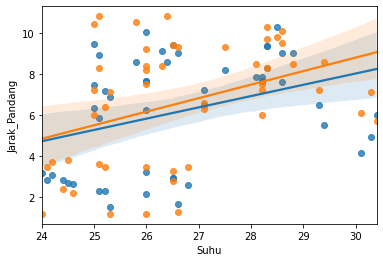

In [98]:
ax = sns.regplot(x=test_x['Suhu'],y=pred_y)
sns.regplot(x=test_x['Suhu'],y=test_y,ax=ax)